In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train_data = pd.read_csv("../input/train_dataset.csv")

In [3]:
import torch

In [22]:
train_data.target.value_counts()

0    94
2    90
1    86
Name: target, dtype: int64

In [23]:
img = np.array(train_data.iloc[0,1:-1])

In [24]:
img.shape

(2352,)

In [25]:
t = torch.tensor(img)

In [26]:
t

tensor([1., 1., 1.,  ..., 1., 1., 1.], dtype=torch.float64)

In [27]:
t.reshape(1,3,28,28)

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.8235, 0.9725, 0.9725],
          [0.9725, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9490]],

         [[0.9490, 0.9490, 0.7490,  ..., 0.3725, 0.5765, 0.5765],
          [0.5765, 0.9255, 0.9255,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.8863, 0.8863, 0.4667],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [28]:
t = t.reshape(28,28,3)

In [17]:
t= np.array(t)

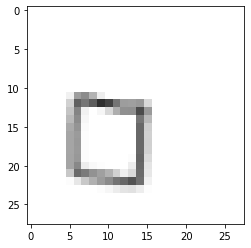

In [18]:
plt.imshow(t)

In [57]:
_

4

In [3]:
import torch

import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F 
import torch.utils.data.dataset as dataset


class ShapeDataset(dataset.Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
    
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, item):
        target = torch.tensor(self.targets[item], dtype = torch.int)
        image = torch.tensor(
            np.array(self.features.iloc[item]), dtype = torch.double
            )
        image = image.reshape(
            3,
            44,
            44,
            )
        return (image, target)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 44, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(44, 16, 3)
        self.fc1 = nn.Linear(16 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*3*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x